In [28]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import time

In [2]:
"""
A module for obtaining repo readme and language data from the github API.
Before using this module, read through it, and follow the instructions marked
TODO.
After doing so, run it like this:
    python acquire.py
To create the `data.json` file that contains the data.
"""
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

# TODO: Make a github personal access token.
#     1. Go here and generate a personal access token: https://github.com/settings/tokens
#        You do _not_ need select any scopes, i.e. leave all the checkboxes unchecked
#     2. Save it in your env.py file under the variable `github_token`
# TODO: Add your github username to your env.py file under the variable `github_username`
# TODO: Add more repositories to the `REPOS` list below.

REPOS = [
    "gocodeup/codeup-setup-script",
    "gocodeup/movies-application",
    "torvalds/linux",
]

headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


if __name__ == "__main__":
    data = scrape_github_data()
    json.dump(data, open("data.json", "w"), indent=1)

In [3]:
scrape_github_data()

[{'repo': 'gocodeup/codeup-setup-script',
  'language': 'Shell',
  'readme_contents': '# Codeup Setup Script\n\nSetup script for Codeup students\' laptops to install all of the tools we will\nneed for the java course. We will install the following:\n\n- [xcode](https://developer.apple.com/xcode/features/): command line tools for\n  macs\n- [brew](http://brew.sh/): package manager for macs\n- [java](https://en.wikipedia.org/wiki/Java_(programming_language))\n- [tomcat](http://tomcat.apache.org/): the java webserver\n- [maven](https://maven.apache.org/): a java dependency and build management tool\n- [mysql](https://www.mysql.com/): the database we\'ll use for the class\n- [node js](https://nodejs.org/en/): a JavaScript runtime outside the browser\n- [npm](https://www.npmjs.com/): a package manager for JavaScript\n- [intellij](https://www.jetbrains.com/idea/): a Java IDE\n\nIn addition, we will:\n\n- setup ssh keys for the student\'s laptop and guide them through the process of\n  linkin

In [57]:
def get_repo_urls()->pd.Series:
    if os.path.isfile('url_csv'):
        return pd.read_csv('url_csv')
    all_links = []
    for i in range(1,151):
        response = requests.get(f'https://github.com/search?p={i}&q=minecraft&type=Repositories').content
        bs = BeautifulSoup(response,'html.parser')
        all_links += [l['href'] for l in bs.find_all('a',class_='v-align-middle')]
        time.sleep(6)
    links = pd.Series(all_links)
    links.to_csv('url_csv',index=False)

In [31]:
get_repo_urls()

In [44]:
df['url'] = df['0'].str.replace('/','',n=1)

In [48]:
df.url

0        MinecraftForge/MinecraftForge
1                   fogleman/Minecraft
2         itzg/docker-minecraft-server
3      overviewer/Minecraft-Overviewer
4      TheGreyGhost/MinecraftByExample
                    ...               
305          Tslat/Advent-Of-Ascension
306            TerrorBite/MinecraftBot
307         tom5454/CustomPlayerModels
308         sefirosweb/minecraftLegion
309                          bdsx/bdsx
Name: url, Length: 310, dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       310 non-null    object
 1   url     310 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


In [58]:
get_repo_urls()

In [59]:
df = pd.read_csv('url_csv')

In [60]:
df

,0
0,/MinecraftForge/MinecraftForge
1,/fogleman/Minecraft
2,/itzg/docker-minecraft-server
3,/overviewer/Minecraft-Overviewer
4,/TheGreyGhost/MinecraftByExample
...,...
555,/GeyserMC/PacketLib
556,/grahamedgecombe/minecraft-installer
557,/espertus/blockly-lua
558,/Crossroads-Development/Crossroads


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       560 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [62]:
df['url'] = df['0'].str.replace('/','',n=1)

In [65]:
df = df.drop(columns='0')

In [66]:
df

,url
0,MinecraftForge/MinecraftForge
1,fogleman/Minecraft
2,itzg/docker-minecraft-server
3,overviewer/Minecraft-Overviewer
4,TheGreyGhost/MinecraftByExample
...,...
555,GeyserMC/PacketLib
556,grahamedgecombe/minecraft-installer
557,espertus/blockly-lua
558,Crossroads-Development/Crossroads


In [67]:
df.nunique()

url    558
dtype: int64

In [68]:
df.url

0            MinecraftForge/MinecraftForge
1                       fogleman/Minecraft
2             itzg/docker-minecraft-server
3          overviewer/Minecraft-Overviewer
4          TheGreyGhost/MinecraftByExample
                      ...                 
555                     GeyserMC/PacketLib
556    grahamedgecombe/minecraft-installer
557                   espertus/blockly-lua
558      Crossroads-Development/Crossroads
559           deathcap/node-minecraft-ping
Name: url, Length: 560, dtype: object

In [70]:
REPOS = list(df.url)

In [73]:
scraped_dict = scrape_github_data()

[{'repo': 'MinecraftForge/MinecraftForge',
  'language': 'Java',
  'readme_contents': ''},
 {'repo': 'fogleman/Minecraft',
  'language': 'Python',
  'readme_contents': "# Minecraft\n\nSimple Minecraft-inspired demo written in Python and Pyglet.\n\nhttp://www.youtube.com/watch?v=kC3lwK631X8\n\n**Like this project?**\n\nYou might also like my other Minecraft clone written in C using modern OpenGL (GL shader language). It performs better, has better terrain generation and saves state to a sqlite database. See here:\n\nhttps://github.com/fogleman/Craft\n\n## Goals and Vision\n\nI would like to see this project turn into an educational tool. Kids love Minecraft and Python is a great first language.\nThis is a good opportunity to get children excited about programming.\n\nThe code should become well commented and more easily configurable. It should be easy to make some simple changes\nand see the results quickly.\n\nI think it would be great to turn the project into more of a library / API..
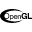
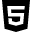
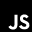
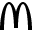
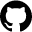
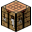
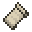

In [74]:
scraped_dict

In [75]:
scraped_df = pd.DataFrame(scraped_dict)

In [77]:
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             560 non-null    object
 1   language         527 non-null    object
 2   readme_contents  560 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


In [78]:
scraped_df

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
...,...,...,...
555,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...
556,grahamedgecombe/minecraft-installer,Groff,
557,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...
558,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...


In [80]:
scraped_df.readme_contents

0                                                       
1      # Minecraft\n\nSimple Minecraft-inspired demo ...
2      [![Docker Pulls](https://img.shields.io/docker...
3      ====================================\nMinecraf...
4      MinecraftByExample [1.16.4]\n=================...
                             ...                        
555    # PacketLib\nPacketLib is a library for packet...
556                                                     
557    Blockly Lua allows you to program ComputerCraf...
558    # Crossroads\n\nA steampunk technology mod for...
559    # node-minecraft-ping\n\nSends a [server list ...
Name: readme_contents, Length: 560, dtype: object

In [81]:
scraped_df.dropna()

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
...,...,...,...
555,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...
556,grahamedgecombe/minecraft-installer,Groff,
557,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...
558,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...


In [84]:
chris_df = pd.read_csv('extra_hyperlink_list.csv')

In [85]:
chris_df

,repo_link
0,MinecraftForge/MinecraftForge
1,fogleman/Minecraft
2,itzg/docker-minecraft-server
3,overviewer/Minecraft-Overviewer
4,TheGreyGhost/MinecraftByExample
...,...
495,GoLangMc/minecraft-server
496,Poudingue/Vanilla-Normals-Renewed-1.12
497,NiclasOlofsson/MiNET
498,manicdigger/manicdigger


In [88]:
REPOS = list(chris_df.repo_link)

In [89]:
REPOS

['MinecraftForge/MinecraftForge',
 'fogleman/Minecraft',
 'itzg/docker-minecraft-server',
 'overviewer/Minecraft-Overviewer',
 'TheGreyGhost/MinecraftByExample',
 'minecraft-dev/MinecraftDev',
 'jdah/minecraft-weekend',
 'mouse0w0/MinecraftDeveloperGuide',
 'Bukkit/Bukkit',
 'TheRemote/MinecraftBedrockServer',
 'CFPAOrg/Minecraft-Mod-Language-Package',
 'UnityTechnologies/MinecraftECS',
 'docker/dockercraft',
 'MCCTeam/Minecraft-Console-Client',
 'Hopson97/MineCraft-One-Week-Challenge',
 'EngineHub/WorldEdit',
 'simondevyoutube/MinecraftClone',
 'MeteorDevelopment/meteor-client',
 'mekanism/Mekanism',
 'ddevault/TrueCraft',
 'PrismarineJS/node-minecraft-protocol',
 'SpongePowered/SpongeAPI',
 'PrismarineJS/minecraft-data',
 'xPaw/PHP-Minecraft-Query',
 'samhogan/Minecraft-Unity3D',
 'GeyserMC/Geyser',
 'Hawstein/PyMinecraft',
 'jkutner/heroku-buildpack-minecraft',
 'walterhiggins/ScriptCraft',
 'doctorray117/minecraft-ondemand',
 'Ahtenus/minecraft-init',
 'Pierce01/MinecraftLauncher-c

In [ ]:
scraped_dict = scrape_github_data()

In [ ]:
scraped_df = pd.DataFrame(scraped_dict)

In [ ]:
scraped_df.to_csv('scraped_data')

In [ ]:
scraped_df